# Entrenamiento fold 3

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Se optó por construir los folds previamente utilizando Weka utilzando un filtro que nos garantiza que estos fueron construidos con un proceso de muestreo samplificado

In [3]:
# Abrimos los .csv del fold

# Fold 3
training_set_3 = pd.read_csv("./fold_3/train.csv")
test_set_3 = pd.read_csv("./fold_3/test.csv")

In [5]:
# Variables en común usadas en todos los entrenamientos

# Número de instancias por pliegue. Todos los folds tienen un número igual
# de instancias positivas y negativas.
attributes = training_set_3.columns[:-1]
class_attribute = training_set_3.columns[-1]
class_attribute_name = training_set_3[training_set_3.columns[-1]].drop_duplicates()

positive_count, negative_count = training_set_3.groupby([class_attribute])[class_attribute].count()


print(attributes)
print(class_attribute)
print(class_attribute_name)
print(positive_count)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')
class
0    tested_positive
1    tested_negative
Name: class, dtype: object
534


## Entrenamiento con fold 1

### Exploración de número de neuronas

In [12]:
from sklearn.neural_network import MLPClassifier

last_expermient_no = 0 # Número del último experimento conducido
init_neurons = (len(attributes)+len(class_attribute_name)) // 2
hidden_layer_sizes = (init_neurons) # Número de neuronas/capas
epochs = 1
learning_rate = 0
momentum = 0


results = []

for neurons_count in range(init_neurons, (init_neurons*2) + 1, 1):
    print(f"================{neurons_count} neurons===================")
    hidden_layer_sizes = (neurons_count) 
    clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=hidden_layer_sizes,
                    random_state=98041)


    #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
    train_attribute_values = training_set_3[attributes]
    train_class_values = training_set_3[class_attribute]

    test_attribute_values = test_set_3[attributes]
    test_class_values = test_set_3[class_attribute]

    ################## Modelo ###########################
    model = clasificador.fit(train_attribute_values, train_class_values)
    ################## Clasificar  #################
    predict = model.predict(test_attribute_values)
    ############ Evaluar ###############################
    report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
    report = classification_report(test_class_values, predict, labels=class_attribute_name)
    # record training set accuracy and error
    training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
    training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
    # record generalization accuracy and error
    test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
    test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
    #print(report)
    print(f"acc={report_dict['accuracy']}")
    print(f"training_accuracy = {training_accuracy}")
    print(f"test_accuracy = {test_accuracy}")
    #last_expermient_no += 1
    #results.append([])


# Escribir los resultados a un .csv para llevar record de los expermientos
#experiments_fold_1 = pd.read_csv('experiments_fold_1.csv')
#for result in results:
#    experiments_fold_1.loc[len(experiments_fold_1)] = result
#experiments_fold_1.to_csv('experiments_fold_1.csv', index=False)


================5 neurons===================
acc=0.7467166979362101
training_accuracy = 0.7582005623242737
test_accuracy = 0.7467166979362101
================6 neurons===================
acc=0.6660412757973734
training_accuracy = 0.6841611996251171
test_accuracy = 0.6660412757973734
================7 neurons===================
acc=0.7354596622889306
training_accuracy = 0.7525773195876289
test_accuracy = 0.7354596622889306
================8 neurons===================
acc=0.7166979362101313
training_accuracy = 0.7497656982193065
test_accuracy = 0.7166979362101313
================9 neurons===================
acc=0.7091932457786116
training_accuracy = 0.7366447985004686
test_accuracy = 0.7091932457786116
================10 neurons===================
acc=0.7429643527204502
training_accuracy = 0.7553889409559512
test_accuracy = 0.7429643527204502


Al hacer esta prueba, a diferencia del entrenamiento con el fold 1, la ventaje de la topología con 8 neuronas no era tan evidente, ya que las topologías con 5 y 10 neuronas presentan un accuracy superior y la diferencia entre los accuracies podría entrar dentro de un rango aceptable, por lo que en el siguiente experimento también voy a probar topologías con 5, 8 y 10 neuronas para ver si vale la pena el costo cómputo extra.

### Experimentación número de capas ocultas

In [7]:
last_expermient_no = 0 # Número del último experimento conducido
epochs = 1
learning_rate = 0
momentum = 0

results = []

hidden_layer_sizes = []

for n in (5, 8, 10):
    hidden_layer_sizes = []
    for _ in range(1, 6, 1):
        hidden_layer_sizes.append(n)
        print(f"================layers = {hidden_layer_sizes}===================")
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=hidden_layer_sizes,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set_3[attributes]
        train_class_values = training_set_3[class_attribute]

        test_attribute_values = test_set_3[attributes]
        test_class_values = test_set_3[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)
        # record training set accuracy and error
        training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
        training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
        # record generalization accuracy and error
        test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
        test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
        #print(report)
        print(f"acc={report_dict['accuracy']}")
        print(f"training_accuracy = {training_accuracy}")
        print(f"test_accuracy = {test_accuracy}")


================layers = [5]===================
acc=0.7467166979362101
training_accuracy = 0.7582005623242737
test_accuracy = 0.7467166979362101
================layers = [5, 5]===================
acc=0.7429643527204502
training_accuracy = 0.761012183692596
test_accuracy = 0.7429643527204502
================layers = [5, 5, 5]===================
acc=0.7485928705440901
training_accuracy = 0.7525773195876289
test_accuracy = 0.7485928705440901
================layers = [5, 5, 5, 5]===================
acc=0.7148217636022514
training_accuracy = 0.7338331771321462
test_accuracy = 0.7148217636022514
================layers = [5, 5, 5, 5, 5]===================
acc=0.7467166979362101
training_accuracy = 0.7600749765698219
test_accuracy = 0.7467166979362101
================layers = [8]===================
acc=0.7166979362101313
training_accuracy = 0.7497656982193065
test_accuracy = 0.7166979362101313
================layers = [8, 8]===================
acc=0.624765478424015
training_accuracy = 0.635426

Con este experimento, se vuelve claro una vez más que la topología [8,8,8] presenta el mejor valor de accuracy, manteniendo la topología relativamente compacta y los errores no muy separados.

### Experimentación número de épocas

################## layers = [8, 8, 8] ########################
---------------------- epochs = 100 -----------------------
New best acc: 0.7703842549203374 with 100 epochs
acc=0.7392120075046904
---------------------- epochs = 110 -----------------------
New best acc: 0.7750702905342081 with 110 epochs
acc=0.7467166979362101
---------------------- epochs = 120 -----------------------
New best acc: 0.7910028116213683 with 120 epochs
acc=0.7804878048780488
---------------------- epochs = 130 -----------------------
New best acc: 0.7966260543580131 with 130 epochs
acc=0.7861163227016885
---------------------- epochs = 140 -----------------------
New best acc: 0.7928772258669166 with 140 epochs
acc=0.7786116322701688
---------------------- epochs = 150 -----------------------
New best acc: 0.7910028116213683 with 150 epochs
acc=0.7898686679174484
---------------------- epochs = 160 -----------------------
New best acc: 0.795688847235239 with 160 epochs
acc=0.7842401500938087
--------------

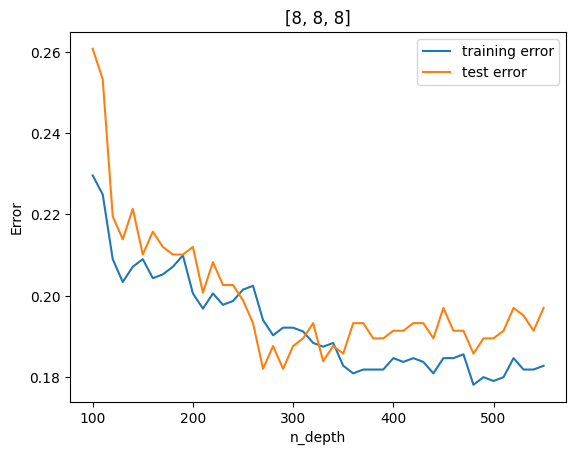

In [9]:
import matplotlib.pyplot as plt

last_expermient_no = 0 # Número del último experimento conducido
learning_rate = 0
momentum = 0

results = []

# se probaron estas topologías inicialmente: [8,8,8], [8,8,8,8] [10], [10, 10, 10], [10, 10, 10, 10]
topologies = [[8,8,8]] 
epochs = range(100, 551, 10) # La granulaidad fue cambiando conforme la experimentación

for topology in topologies:
    print(f"################## layers = {topology} ########################")
    
    training_accuracy = []
    test_accuracy = []
    training_error = []
    test_error = []
    
    for epoch in epochs:
        print(f"---------------------- epochs = {epoch} -----------------------")
        best_acc = -1
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=topology,
                        max_iter = epoch,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set_3[attributes]
        train_class_values = training_set_3[class_attribute]

        test_attribute_values = test_set_3[attributes]
        test_class_values = test_set_3[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)

        training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
        training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))

        if training_accuracy[-1] > best_acc:
            print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
            best_acc = training_accuracy[-1]

        test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
        test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
        print(f"acc={report_dict['accuracy']}")

    plt.figure()
    plt.title(str(topology))
    plt.plot(epochs, training_error, label="training error")
    plt.plot(epochs, test_error, label="test error")
    plt.ylabel("Error")
    plt.xlabel("n_depth")
    plt.legend()

Experimentos:
1. range(10, 351, 5)
2. range(100, 551, 10)
Notamos que el accuracy sigue mejorando conforme aumentan el número de épocas hasta llegar a 350, pues después de este punto se entra en overfitting


### Experimentos variando learning rate y momentum

NOTA: MLPClassifier ignora los parámetros de learning rate y momentum
cuando se usa el solver lbfgs. Cambié momentariamente a sgd para probar si de esta
forma mejoraba el performance con sgd, pero como se puede observar, no fue el caso.

================LR: 0.1 mom=0.3=======================
New best acc: 0.5604498594189316 with 10 epochs
New best acc: 0.5679475164011246 with 15 epochs
New best acc: 0.5754451733833177 with 45 epochs
New best acc: 0.5763823805060918 with 50 epochs
================LR: 0.1 mom=0.6=======================
New best acc: 0.49953139643861294 with 10 epochs
================LR: 0.1 mom=0.9=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.3 mom=0.3=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.3 mom=0.6=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.3 mom=0.9=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.5 mom=0.3=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.5 mom=0.6=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.5 mom=0.9

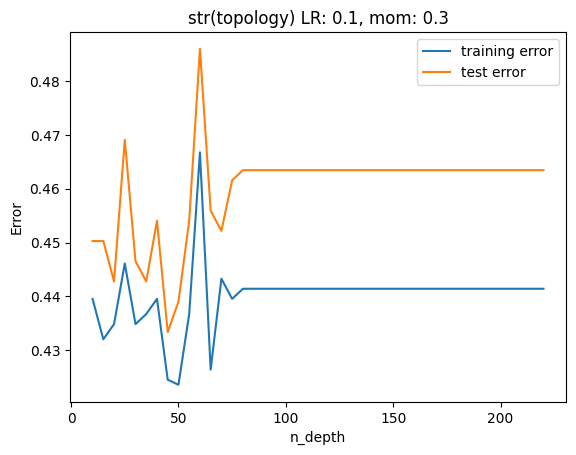

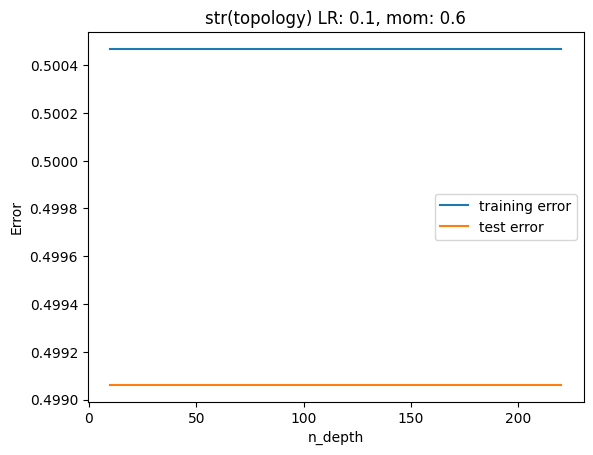

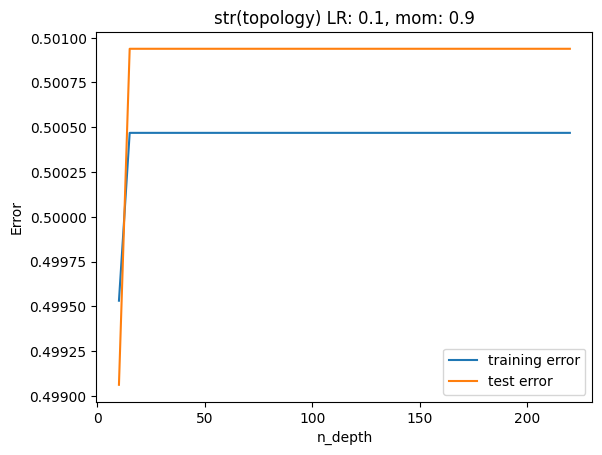

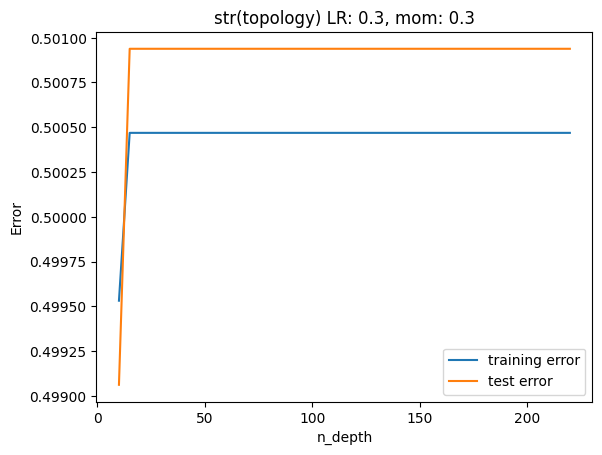

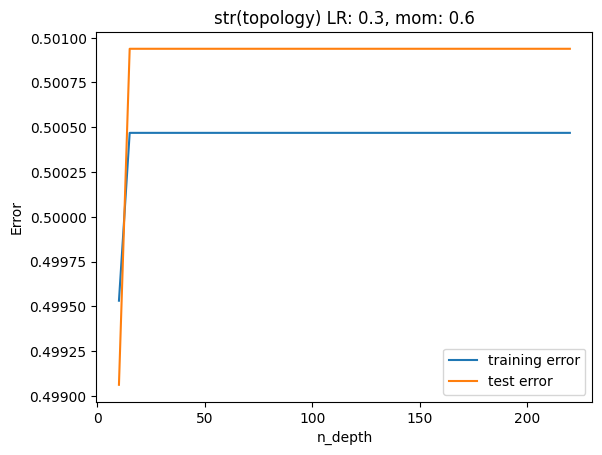

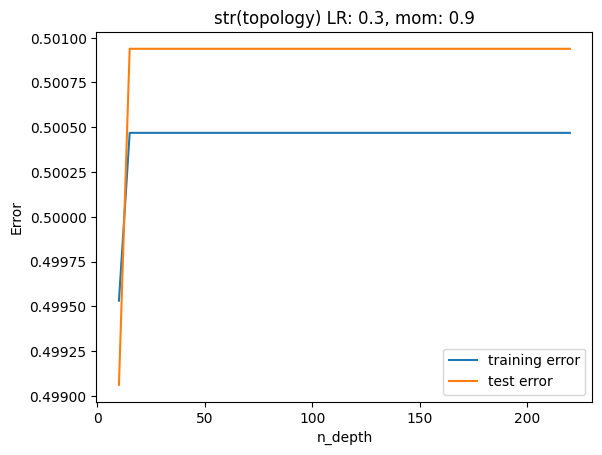

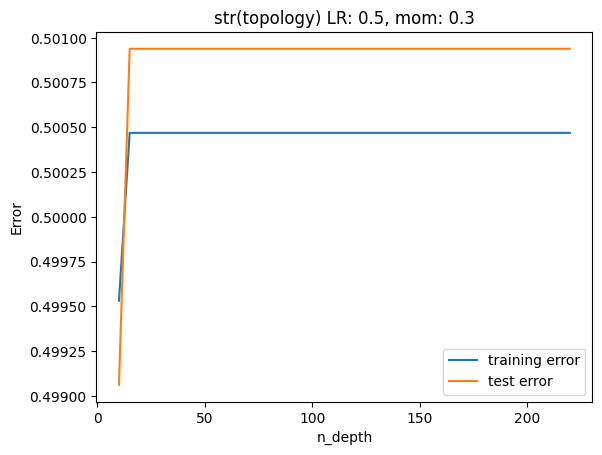

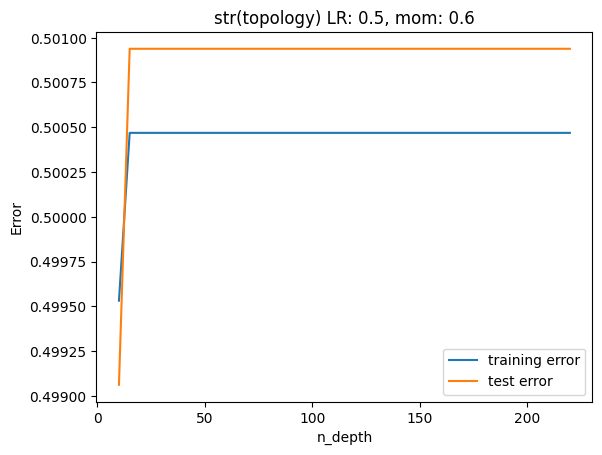

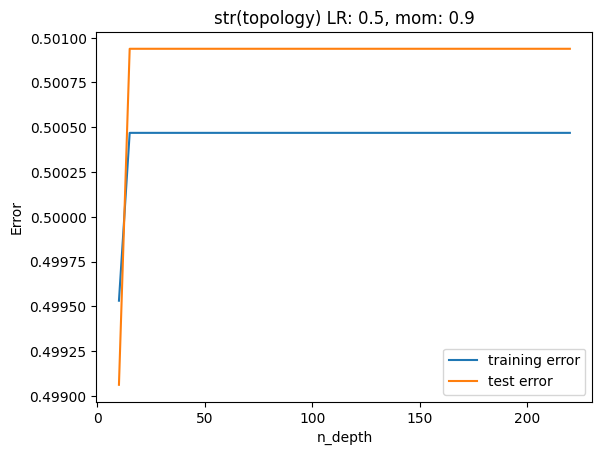

In [10]:
last_expermient_no = 0 # Número del último experimento conducido

# se probaron estas topologías inicialmente: [[8], [8,8,8], [8, 8, 8, 8]]
# Epochs ideal 185
epochs = range(10, 225, 5) # añado un pequeño margen para comprobar que si se entra en overfitting

learning_rate_range = range(1,7,2)
momentum_range = range(3,11,3)

for _lr in learning_rate_range:
    lr = _lr / 10.0
    for _momentum in momentum_range:
        best_acc = -1
        momentum = _momentum / 10.0 if _momentum != 0 else 0
        print(f"================LR: {lr} mom={momentum}=======================")
        training_accuracy = []
        test_accuracy = []
        training_error = []
        test_error = []
        for epoch in epochs:
            clasificador = MLPClassifier(solver='sgd', 
                        hidden_layer_sizes=[8,8,8],
                        max_iter = epoch,
                        random_state=98041,
                        learning_rate_init=lr,
                        momentum=momentum
                        )
            #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
            train_attribute_values = training_set_3[attributes]
            train_class_values = training_set_3[class_attribute]
            test_attribute_values = test_set_3[attributes]
            test_class_values = test_set_3[class_attribute]
            ################## Modelo ###########################
            model = clasificador.fit(train_attribute_values, train_class_values)
            ################## Clasificar  #################
            predict = model.predict(test_attribute_values)
            ############ Evaluar ###############################
            report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
            report = classification_report(test_class_values, predict, labels=class_attribute_name)
            training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
            if training_accuracy[-1] > best_acc:
                print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
                best_acc = training_accuracy[-1]

            training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))
            test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
            test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
            # print(f"acc={report_dict['accuracy']}")
        plt.figure()
        title = f"str(topology) LR: {lr}, mom: {momentum}"
        plt.title(title)
        plt.plot(epochs, training_error, label="training error")
        plt.plot(epochs, test_error, label="test error")
        plt.ylabel("Error")
        plt.xlabel("n_depth")
        plt.legend()

## Parámetros escogidos

Después de experimentar, los parámetros que me dieron mejores resultados fueron:

- solver = 'lbfgs'
- topología = [8, 8, 8]
- épocas = 350
- learning rate = N/A
- momentum = N/A


In [11]:
clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=[8,8,8],
                    max_iter = 350,
                    random_state=98041,
)
#A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
train_attribute_values = training_set_3[attributes]
train_class_values = training_set_3[class_attribute]
test_attribute_values = test_set_3[attributes]
test_class_values = test_set_3[class_attribute]
################## Modelo ###########################
model = clasificador.fit(train_attribute_values, train_class_values)
################## Clasificar  #################
predict = model.predict(test_attribute_values)
############ Evaluar ###############################
report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
acc = report_dict["accuracy"]
report = classification_report(test_class_values, predict, labels=class_attribute_name)

print(f"accuracy exacto: {acc}")
print(report)

accuracy exacto: 0.8142589118198874
                 precision    recall  f1-score   support

tested_positive       0.82      0.81      0.81       266
tested_negative       0.81      0.82      0.82       267

       accuracy                           0.81       533
      macro avg       0.81      0.81      0.81       533
   weighted avg       0.81      0.81      0.81       533

